**Task 5**-Advanced Stock Market Prediction


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import datetime

In [4]:
data=pd.read_csv("QMCI.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,0.17,0.17,0.17,0.17,0.17,12100
1,2021-07-20,0.17,0.17,0.17,0.17,0.17,43800
2,2021-07-21,0.17,0.20,0.17,0.20,0.20,64000
3,2021-07-22,0.20,0.20,0.19,0.19,0.19,90000
4,2021-07-23,0.19,0.19,0.18,0.19,0.19,91600
...,...,...,...,...,...,...,...
246,2022-07-11,0.20,0.21,0.20,0.20,0.20,36200
247,2022-07-12,0.21,0.22,0.19,0.19,0.19,50500
248,2022-07-13,0.19,0.19,0.19,0.19,0.19,24800
249,2022-07-14,0.19,0.19,0.19,0.19,0.19,100


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,0.17,0.17,0.17,0.17,0.17,12100
1,2021-07-20,0.17,0.17,0.17,0.17,0.17,43800
2,2021-07-21,0.17,0.20,0.17,0.20,0.20,64000
3,2021-07-22,0.20,0.20,0.19,0.19,0.19,90000
4,2021-07-23,0.19,0.19,0.18,0.19,0.19,91600


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2022-07-11,0.20,0.21,0.20,0.20,0.20,36200
247,2022-07-12,0.21,0.22,0.19,0.19,0.19,50500
248,2022-07-13,0.19,0.19,0.19,0.19,0.19,24800
249,2022-07-14,0.19,0.19,0.19,0.19,0.19,100
250,2022-07-15,0.19,0.19,0.18,0.19,0.19,35800


In [7]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'FB']
tech_list

['AAPL', 'GOOG', 'TSLA', 'FB']

In [8]:
# Set up End and Start times for data grab (We will analyze for 2 years)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [9]:
data.columns



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      251 non-null    object 
 1   open      251 non-null    float64
 2   high      251 non-null    float64
 3   low       251 non-null    float64
 4   close     251 non-null    float64
 5   adjclose  251 non-null    float64
 6   volume    251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [13]:
data.describe()

,open,high,low,close,adjclose,volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.00000
mean,0.190837,0.195458,0.186853,0.190876,0.190876,40349.40239
std,0.030445,0.033575,0.027467,0.030699,0.030699,62340.85105
min,0.150000,0.160000,0.150000,0.150000,0.150000,0.00000
25%,0.170000,0.170000,0.170000,0.170000,0.170000,3550.00000
50%,0.180000,0.190000,0.180000,0.180000,0.180000,15100.00000
75%,0.200000,0.210000,0.190000,0.200000,0.200000,49900.00000
max,0.310000,0.340000,0.290000,0.310000,0.310000,350200.00000


In [14]:
data.reset_index(inplace=True)

In [15]:
#before moving forward let us calculate first the actual 
data_price = round((data['high'] + data['low'] + data['close'])/ 3, 2)
data_price  #actual price

0      0.17
1      0.17
2      0.19
3      0.19
4      0.19
       ... 
246    0.20
247    0.20
248    0.19
249    0.19
250    0.19
Length: 251, dtype: float64

In [16]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'Date': df['Date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

Text(0.5, 0, 'High')

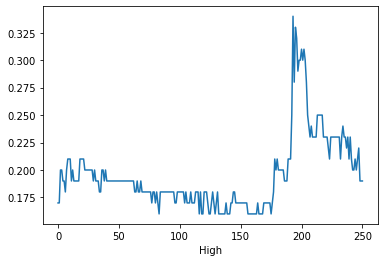

In [17]:
data["high"].plot()
plt.xlabel("High")


Text(0.5, 0, 'High')

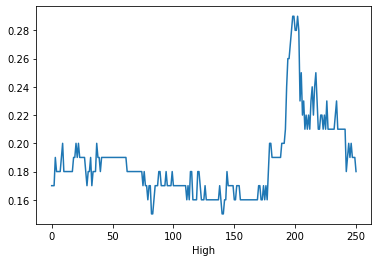

In [18]:
data["low"].plot()
plt.xlabel("High")

Text(0.5, 0, 'open')

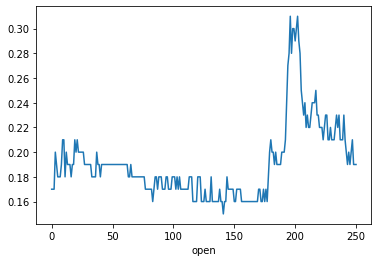

In [19]:
data["open"].plot()
plt.xlabel("open")

Text(0.5, 0, 'open')

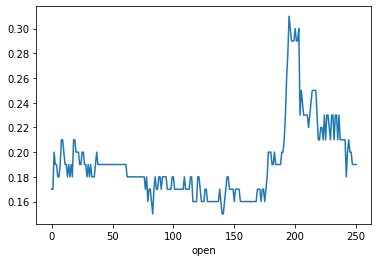

In [20]:
data["close"].plot()
plt.xlabel("open")

Text(0.5, 0, 'open')

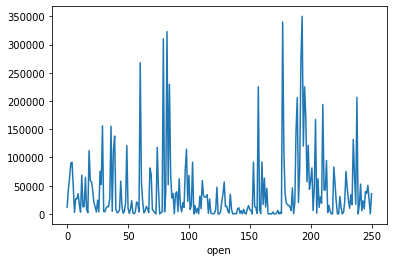

In [21]:
data["volume"].plot()
plt.xlabel("open")

In [22]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data.set_index(['Date'])
data.fillna(method='ffill',inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(data)
data=scale.transform(data)

In [24]:
def sss(w):
    t1,t2=w.shape
    a=[]
    t={}
    for i in range(t2):
        for j in range(t1):
                a.append(w[j][i])
        ss=pd.Series(a)
        t.update({i:ss})
        a=[]
    k=[]
    for i,j in t.items():
        k.append(j)
    ww=pd.concat(k,axis=1)
    n=len(ww.columns)
    for i in range(n):
         ww[n+i]=ww[i].shift(-1)
    return ww

In [25]:
w=sss(data)


In [26]:
w

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000,0.1250,0.055556,0.142857,0.1250,0.1250,0.034552,0.004,0.1250,0.055556,0.142857,0.1250,0.1250,0.125071
1,0.004,0.1250,0.055556,0.142857,0.1250,0.1250,0.125071,0.008,0.1250,0.222222,0.142857,0.3125,0.3125,0.182753
2,0.008,0.1250,0.222222,0.142857,0.3125,0.3125,0.182753,0.012,0.3125,0.222222,0.285714,0.2500,0.2500,0.256996
3,0.012,0.3125,0.222222,0.285714,0.2500,0.2500,0.256996,0.016,0.2500,0.166667,0.214286,0.2500,0.2500,0.261565
4,0.016,0.2500,0.166667,0.214286,0.2500,0.2500,0.261565,0.020,0.1875,0.166667,0.214286,0.1875,0.1875,0.140777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.984,0.3125,0.277778,0.357143,0.3125,0.3125,0.103370,0.988,0.3750,0.333333,0.285714,0.2500,0.2500,0.144203
247,0.988,0.3750,0.333333,0.285714,0.2500,0.2500,0.144203,0.992,0.2500,0.166667,0.285714,0.2500,0.2500,0.070817
248,0.992,0.2500,0.166667,0.285714,0.2500,0.2500,0.070817,0.996,0.2500,0.166667,0.285714,0.2500,0.2500,0.000286
249,0.996,0.2500,0.166667,0.285714,0.2500,0.2500,0.000286,1.000,0.2500,0.166667,0.214286,0.2500,0.2500,0.102227


In [27]:
w.fillna(method='ffill',inplace=True)

In [28]:
w.drop([6,7,8,9],axis=1,inplace=True)

In [29]:
w

,0,1,2,3,4,5,10,11,12,13
0,0.000,0.1250,0.055556,0.142857,0.1250,0.1250,0.142857,0.1250,0.1250,0.125071
1,0.004,0.1250,0.055556,0.142857,0.1250,0.1250,0.142857,0.3125,0.3125,0.182753
2,0.008,0.1250,0.222222,0.142857,0.3125,0.3125,0.285714,0.2500,0.2500,0.256996
3,0.012,0.3125,0.222222,0.285714,0.2500,0.2500,0.214286,0.2500,0.2500,0.261565
4,0.016,0.2500,0.166667,0.214286,0.2500,0.2500,0.214286,0.1875,0.1875,0.140777
...,...,...,...,...,...,...,...,...,...,...
246,0.984,0.3125,0.277778,0.357143,0.3125,0.3125,0.285714,0.2500,0.2500,0.144203
247,0.988,0.3750,0.333333,0.285714,0.2500,0.2500,0.285714,0.2500,0.2500,0.070817
248,0.992,0.2500,0.166667,0.285714,0.2500,0.2500,0.285714,0.2500,0.2500,0.000286
249,0.996,0.2500,0.166667,0.285714,0.2500,0.2500,0.214286,0.2500,0.2500,0.102227


In [30]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float64
 1   1       251 non-null    float64
 2   2       251 non-null    float64
 3   3       251 non-null    float64
 4   4       251 non-null    float64
 5   5       251 non-null    float64
 6   10      251 non-null    float64
 7   11      251 non-null    float64
 8   12      251 non-null    float64
 9   13      251 non-null    float64
dtypes: float64(10)
memory usage: 19.7 KB


In [31]:
www=w.values
xtrain,xtest,ytrain,ytest=www[:3759,0:5],www[3759:,0:5],www[:3759,-1],www[3759:,-1]
xtes=xtest

In [32]:
xtes

array([], shape=(0, 5), dtype=float64)

In [33]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout,SpatialDropout1D
from keras.layers import Bidirectional

In [35]:
model=Sequential()
model.add(Bidirectional(LSTM(100,activation="relu",input_shape=(xtrain.shape[1],xtrain.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32,verbose=2)

Epoch 1/50
8/8 - 3s - loss: 0.0344 - 3s/epoch - 373ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0326 - 94ms/epoch - 12ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0315 - 82ms/epoch - 10ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0308 - 82ms/epoch - 10ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0306 - 84ms/epoch - 11ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0307 - 84ms/epoch - 10ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0306 - 97ms/epoch - 12ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0307 - 83ms/epoch - 10ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0306 - 75ms/epoch - 9ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0305 - 78ms/epoch - 10ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0305 - 79ms/epoch - 10ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0305 - 75ms/epoch - 9ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0306 - 83ms/epoch - 10ms/step
Epoch 14/50
8/8 - 0s - loss: 0.0305 - 81ms/epoch - 10ms/step
Epoch 15/50
8/8 - 0s - loss: 0.0305 - 80ms/epoch - 10ms/step
Epoch 16/50
8/8 - 0s - loss: 0.0306 - 95ms/epoch - 12ms/step
Epoch 17/50
8/8 - 0s - loss: 0.0305 